# Task 5

In [1]:
using DataFrames, GLM, StatsBase
using Plots
using StatsPlots
include("MBP.jl")
include("alphastable.jl")

alphastable (generic function with 1 method)

In [2]:
Alpha = [1.5, 0.75];
beta = 0;
Gam = [1 2];
delta = 0;
N = 10 ^ 3;
MC = 10 ^ 3;
len = 10 ^ 4;
t = range(0.01, 3, length=len);

## Showing the estimator of $\varphi$

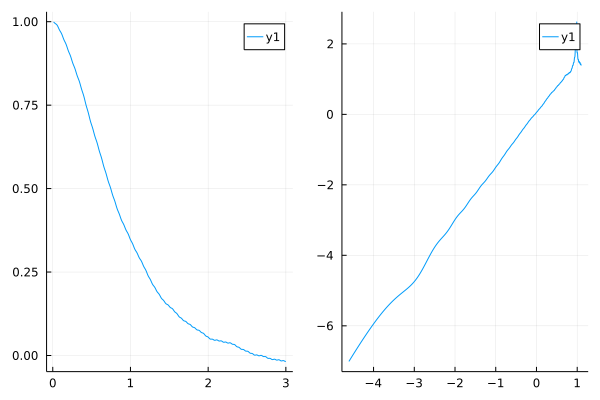

In [3]:
alp = Alpha[1];
gam = Gam[1];
X = alphastable(N, 1, alp, beta, gam, delta, 1);
Re_char_X = characterist_r_i(t, X, N)[:, 1];
p1 = plot(t, Re_char_X);
p2 = plot(log.(t), log.(-log.(abs.(Re_char_X))));
plot(p1, p2)

In [4]:
function get_alpha(alp, beta, gam, delta, N, t, MC)
    X = alphastable(N, 1, alp, beta, gam, delta, 1);
    Re_char_X = characterist_r_i(t, X, N)[:, 1];
    Y = log.(-log.(abs.(Re_char_X)))
    X = [log.(t) ones(length(Y), 1)];
    est = ((X' * X) ^ (-1) * X' * Y)[1]
    return est
end

get_alpha (generic function with 1 method)

In [5]:
Est_matrice = ones(MC, length(Alpha)) * -999;

for i in range(1, MC)
    for j in range(1, length(Alpha))
        alp = Alpha[j];
        gam = Gam[j];
        Est_matrice[i, j] = get_alpha(alp, beta, gam, delta, N, t, MC)
    end
end

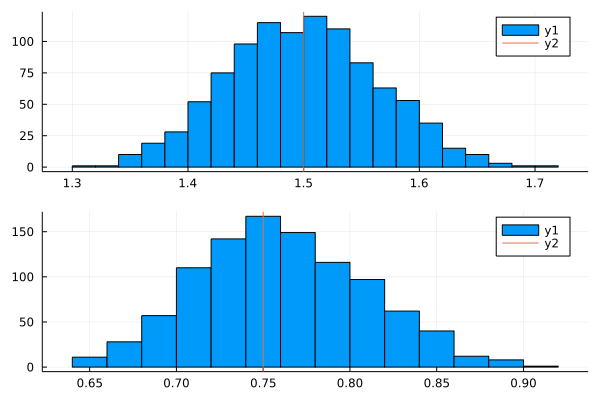

In [6]:
p3 = histogram(Est_matrice[:, 1])
vline!([1.5])
p4 = histogram(Est_matrice[:, 2])
vline!([0.75])
StatsPlots.plot(p3, p4, layout = (2, 1))

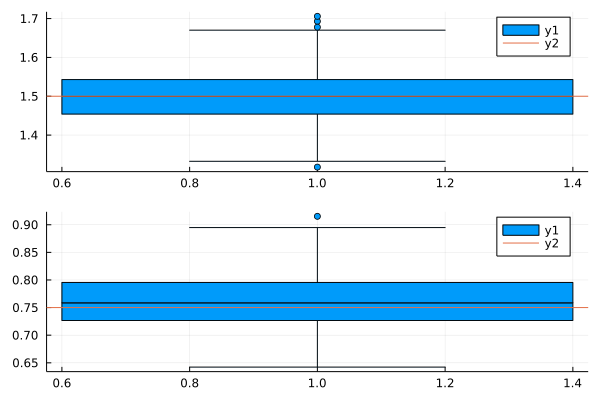

In [7]:
p3 = StatsPlots.boxplot(Est_matrice[:, 1])
hline!([1.5])
p4 = StatsPlots.boxplot(Est_matrice[:, 2])
hline!([0.75])
StatsPlots.plot(p3, p4, layout = (2, 1))